In [1]:
#Importing all necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

import seaborn as sns  # For advanced plotting and data visualization
import matplotlib.pyplot as plt  # For basic plotting

# Scikit-learn model selection tools
from sklearn.model_selection import (
    train_test_split,     # Split dataset into train/test
    StratifiedKFold,      # Stratified K-Folds for CV
    cross_val_score,      # Evaluate model with CV
    cross_val_predict,    # Get CV predictions
    GridSearchCV,         # Hyperparameter tuning
    learning_curve        # Plot learning curves
)

# Decision Tree tools
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree  # Alternative plotting functions

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer  # Combine numeric/categorical preprocessing
from sklearn.pipeline import Pipeline           # Build processing + model pipeline

# Metrics and scoring
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,  # Confusion matrix functions
    roc_auc_score, roc_curve, auc,             # ROC/AUC evaluation
    make_scorer,                               # Custom scoring function
    accuracy_score                             # Accuracy evaluation
)

In [2]:
#Load Dataset
df = pd.read_csv("Assignment 1 Data.csv")

Data Preprocessing

In [3]:
#Loading the first five samples of data
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,status,others,residence,property,age,otherplans,housing,cards,job,liable,foreign
0,0,A11,6.0,A34,A43,1169.0,A65,A75,A93,A101,4,A121,67.0,A143,A152,2.0,A173,1.0,A201
1,1,A12,48.0,A32,A43,5951.0,A61,A73,A92,A101,2,A121,22.0,A143,A152,1.0,A173,1.0,A201
2,0,A14,12.0,A34,A46,2096.0,A61,A74,A93,A101,3,A121,49.0,A143,A152,1.0,A172,2.0,A201
3,0,A11,42.0,A32,A42,7882.0,A61,A74,A93,A103,4,A122,45.0,A143,A153,1.0,A173,2.0,A201
4,1,A11,24.0,A33,A40,4870.0,A61,A73,A93,A101,4,A124,53.0,A143,A153,2.0,A173,2.0,A201


In [4]:
#Checking the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default          1000 non-null   int64  
 1   checkingstatus1  1000 non-null   object 
 2   duration         995 non-null    float64
 3   history          996 non-null    object 
 4   purpose          987 non-null    object 
 5   amount           984 non-null    float64
 6   savings          995 non-null    object 
 7   employ           990 non-null    object 
 8   status           993 non-null    object 
 9   others           994 non-null    object 
 10  residence        1000 non-null   int64  
 11  property         992 non-null    object 
 12  age              998 non-null    float64
 13  otherplans       1000 non-null   object 
 14  housing          994 non-null    object 
 15  cards            996 non-null    float64
 16  job              991 non-null    object 
 17  liable         

In [5]:
#Generating the statistics
df.describe()

,Default,duration,amount,residence,age,cards,liable
count,1000.000000,995.000000,984.000000,1000.000000,998.000000,996.000000,997.000000
mean,0.300000,20.884422,3263.087398,2.845000,35.537074,1.407631,1.155466
std,0.458487,12.069455,2830.697012,1.103718,11.379482,0.578077,0.362531
min,0.000000,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1363.250000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2302.500000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3965.250000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


#Checking for duplicates

In [6]:
#Checking for duplicate entries
df.duplicated().sum()

0

Checking for null values

In [7]:
#Checking for null values
df.isna().sum()

Default             0
checkingstatus1     0
duration            5
history             4
purpose            13
amount             16
savings             5
employ             10
status              7
others              6
residence           0
property            8
age                 2
otherplans          0
housing             6
cards               4
job                 9
liable              3
foreign            12
dtype: int64

In [8]:
#  Handle missing values - Numerical Features
# Fill numeric with median
num_cols = ['duration', 'amount', 'age', "residence", 'cards', 'liable']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
#  Handle missing values - Categorical Features
# Fill categorical with mode
cat_cols = ['checkingstatus1','history','purpose','savings','employ',
            'status','others','property','housing','job', 'otherplans', 'foreign']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

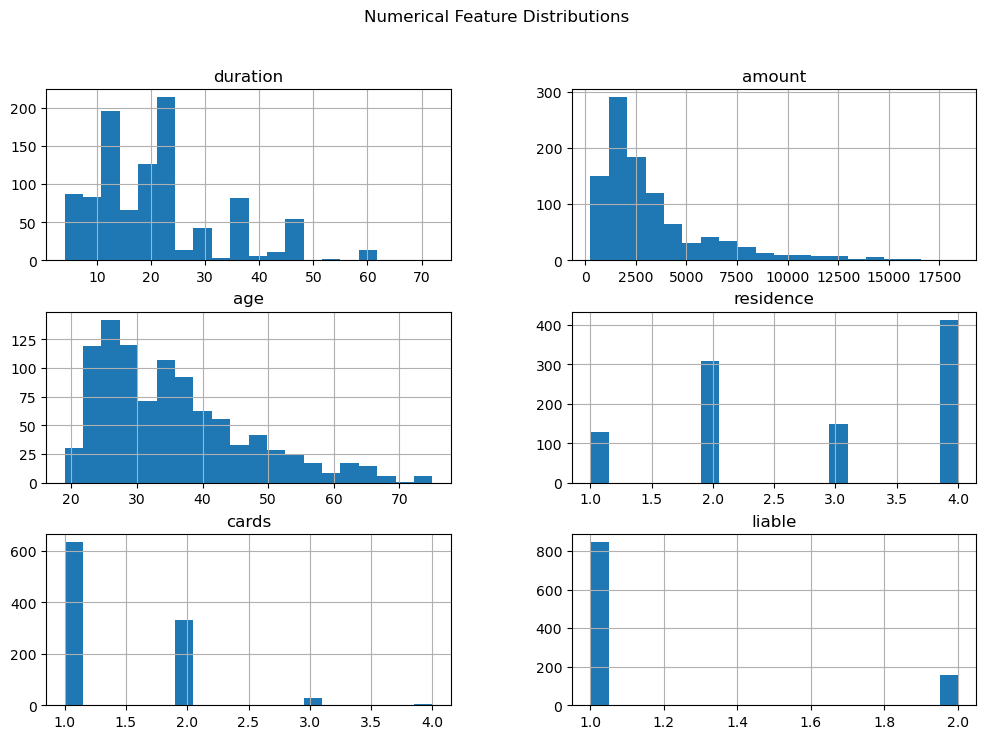

In [10]:
# Distribution plots for numeric columns
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions")
plt.show()

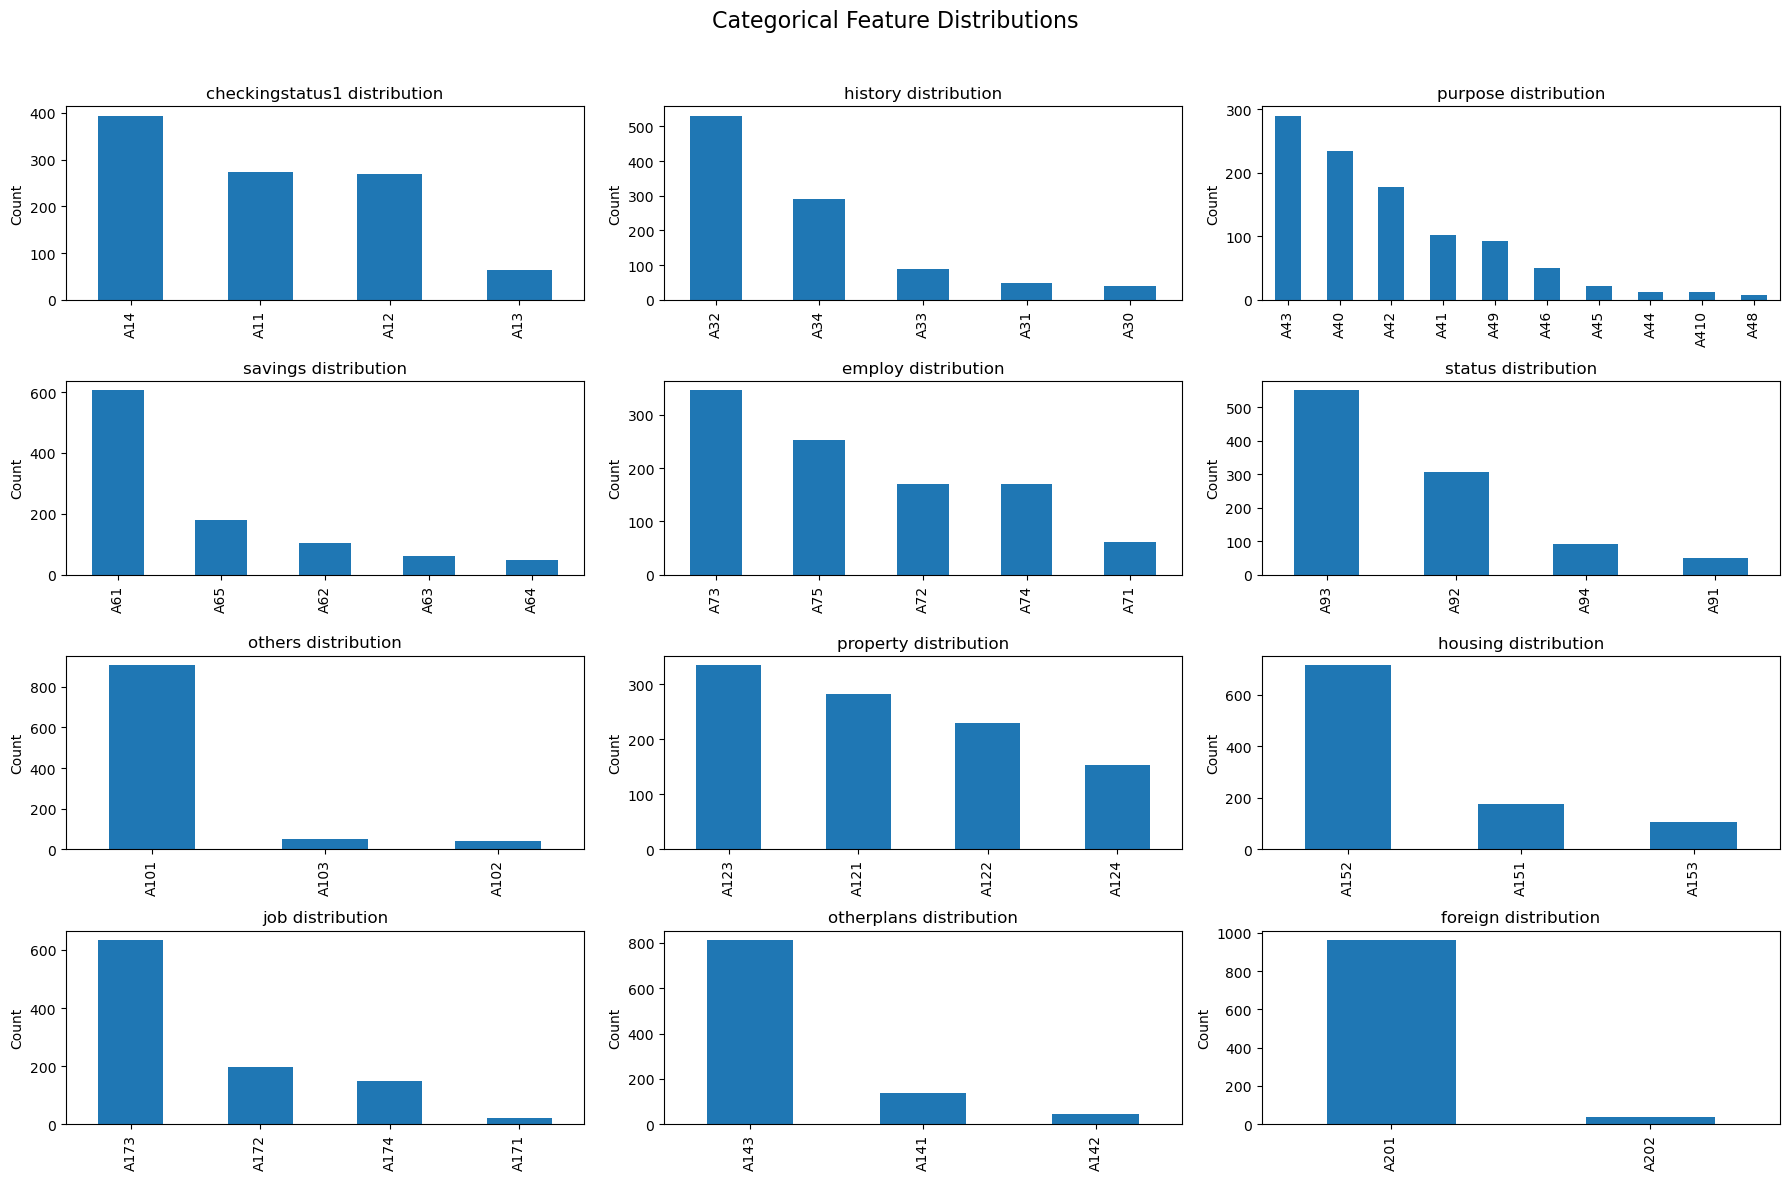

In [11]:
# Distribution plots for categorical columns

# Set up subplot grid: 3 columns, enough rows to fit all categorical features
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # ceiling division to ensure all features fit

# Create figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))  
axes = axes.flatten()  # Flatten 2D axes array for easy iteration

# Loop through each categorical feature and plot top 10 value counts
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(
        kind="bar", ax=axes[i], title=f"{col} distribution"
    )
    axes[i].set_xlabel("")  # Remove x-axis label for cleaner plot
    axes[i].set_ylabel("Count")  # Y-axis represents counts of each category

# Remove any empty subplots if the number of features is less than total subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=16)  # Main figure title
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to leave space for the main title
plt.show()


In [12]:
# --- Ordinal Encoding for Categorical Features - Savings, Credit History, Employ and Checking ---

# Savings: more savings = lower risk
savings_map = {
    'A65': 1,  # unknown/no savings
    'A61': 2,  # < 100 DM
    'A62': 3,  # 100–500 DM
    'A63': 4,  # 500–1000 DM
    'A64': 5   # >= 1000 DM
}
df['savings_ord'] = df['savings'].map(savings_map)

# Credit history: better history = lower risk
credit_history_map = {
    'A30': 4,  # no credits taken / all credits paid back duly (best)
    'A31': 3,  # all credits at this bank paid back duly
    'A32': 2,  # existing credits paid back duly till now
    'A33': 1,  # delay in paying off in the past
    'A34': 0   # critical account / other credits existing (worst)
}
df['history_ord'] = df['history'].map(credit_history_map)

employ_map = {
    'A71': 0,   # unemployed
    'A72': 1,   # < 1 year
    'A73': 2,   # 1 <= ... < 4 years
    'A74': 3,   # 4 <= ... < 7 years
    'A75': 4    # >= 7 years
}

df['employ_ord'] = df['employ'].map(employ_map)

checking_map = {
    'A11': 0,  # < 0 DM (worst)
    'A14': 1,  # no checking account (bad, but not as bad as overdrawn)
    'A12': 2,  # 0–200 DM
    'A13': 3   # >= 200 DM (best)
}

df['checkingstatus1_ord'] = df['checkingstatus1'].map(checking_map)

In [13]:
# Feature Engineering  - Adding feature "amount_per_duration"
# Loan amount relative to duration
df['amount_per_duration'] = df['amount'] / (df['duration'] + 1e-5)  # avoid divide by zero

df.drop(columns=[ 'amount', 'duration','checkingstatus1', 'savings','employ', 'history'], inplace=True)

num_cols =  ['residence', 'cards', 'checkingstatus1_ord', 'savings_ord', 'liable', 'amount_per_duration', 'history_ord', 'age','employ_ord']
cat_cols =  ['purpose', 'status', 'others', 'housing', 'job', 'otherplans', 'property']

#Splitting the dataset into input variables/features and output/target

In [14]:
#Splitting the dataset into input variables/features and output/target
X = df.drop("Default", axis=1)
y = df["Default"]

Target distribution:
Default
0    700
1    300
Name: count, dtype: int64


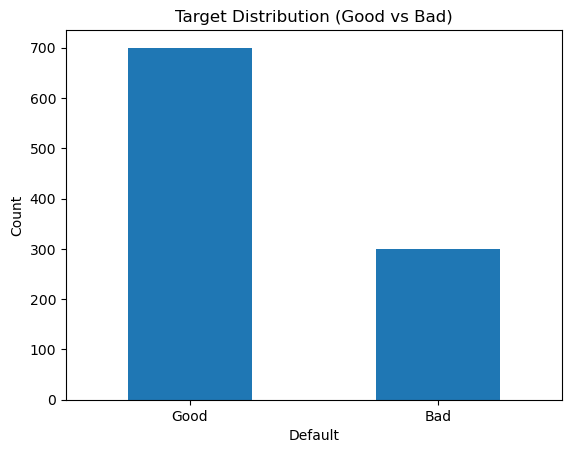

In [15]:
# Target variable distribution
print("Target distribution:")
print(y.value_counts())

y.value_counts().plot(kind="bar", title="Target Distribution (Good vs Bad)")
plt.xticks([0, 1], ["Good", "Bad"], rotation=0)
plt.ylabel("Count")
plt.show()

In [16]:
# ColumnTransformer is used to apply different preprocessing steps to categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical columns; 'ignore' handles unseen categories in test data
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),

        # Leave numerical columns unchanged (passthrough means no transformation)
        ("num", "passthrough", num_cols)
    ]
)

In [17]:
# Fit the preprocessor on the full dataset (X only, not y)
preprocessor.fit(X)

# Transform the entire dataset
X_transformed = preprocessor.transform(X)

# Get feature names 
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, ohe_features])
# Convert to DataFrame
df_preprocessed = pd.DataFrame(X_transformed.toarray() 
                               if hasattr(X_transformed, "toarray") 
                               else X_transformed,
                               columns=all_features)

# Add the target back
df_preprocessed["Default"] = y.values

# Save to CSV
df_preprocessed.to_csv("preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved as preprocessed_dataset.csv")

Preprocessed dataset saved as preprocessed_dataset.csv


In [18]:
# Split dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% of data used for final testing
    random_state=42,     # Fix random seed for reproducibility
    stratify=y           # Preserve class distribution (important due to class imbalance)
)

Baseline Model

In [19]:
# Decision Tree Classifier setup
clf = DecisionTreeClassifier(
    random_state=42,         # Ensures reproducibility (same splits every run)
    class_weight={0:1, 1:10} # Apply cost-sensitive learning: misclassifying class 1 (Bad) 
                             # is 10x more costly than class 0 (Good)
)

In [20]:
# Create a pipeline to streamline preprocessing and model training
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Step 1: Apply preprocessing (encoding + numeric passthrough)
    ("classifier", clf)              # Step 2: Train Decision Tree classifier on processed data
])

In [21]:
# ---  Custom cost function for misclassification ---
def cost_value(y_true, y_pred):
    # Compute confusion matrix with labels ordered as Good (0) and Bad (1)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    
    # Apply cost matrix: 
    # - False Negatives (missed Bad customers) are 10x more costly
    # - False Positives (misclassified Good customers) cost 1x
    return fn * 10 + fp * 1  

# Wrap custom cost function into a scorer for cross-validation
# Set greater_is_better=False since lower cost is better
cost_scorer = make_scorer(cost_value, greater_is_better=False)

In [22]:
# 10-fold stratified Cross-Validation setup
cv = StratifiedKFold(
    n_splits=10,          # Split the data into 10 folds (10 train/validation splits)
    shuffle=True,         # Shuffle the data before splitting to ensure randomness
    random_state=42       # Fix the random seed so results are reproducible
)

In [23]:
# --- Cross-validation performance (fold-wise costs) ---
# Evaluate the pipeline (preprocessing + decision tree) using 10-fold Stratified CV
# cross_val_score will train on 9 folds and validate on the 1 remaining fold, repeated 10 times
cv_scores = cross_val_score(
    pipeline,           # pipeline: preprocessing + classifier
    X_train,            # training features
    y_train,            # training labels
    cv=cv,              # 10-fold stratified cross-validation
    scoring=cost_scorer # use custom cost function as evaluation metric
)

# cv_scores are returned as NEGATIVE values (since greater_is_better=False in cost_scorer)
# Multiply by -1 to convert them back to actual misclassification costs
cv_costs = -cv_scores   

# Print baseline model evaluation results from CV
print("\nBaseline Model")
print("-"*15)
print("Training Set - Mean CV Cost:", cv_costs.mean())   # Average cost across all folds
print("Training Set - CV costs (per fold):", cv_costs)   # Cost for each individual fold


Baseline Model
---------------
Training Set - Mean CV Cost: 150.1
Training Set - CV costs (per fold): [143 137 151 179 162 152 155 190 129 103]


In [24]:
# --- CV-based Training Performance (out-of-fold predictions) ---
# cross_val_predict generates predictions for each training sample using a "fold-out" approach:
#   - For each fold, the model is trained on 9 folds and predicts on the 1 left-out fold.
#   - This ensures that every training instance is predicted by a model that did not see it during training.

# Predicted class labels for each training sample (out-of-fold)
y_train_cv_pred = cross_val_predict(
    pipeline,  # pipeline: preprocessing + classifier
    X_train,   # training features
    y_train,   # training labels
    cv=cv      # 10-fold stratified cross-validation
)

# Predicted probabilities for the positive class (Bad=1) for each training sample
y_train_cv_prob = cross_val_predict(
    pipeline, 
    X_train, 
    y_train, 
    cv=cv, 
    method="predict_proba"  # returns probability estimates
)[:, 1]  # take probability of positive class (Bad)

In [25]:
# --- Fit final model on full training & evaluate on test set ---
# Fit the pipeline (preprocessing + classifier) on the entire training set
pipeline.fit(X_train, y_train)

# Predict class labels for the test set
y_test_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class (Bad=1) for ROC-AUC and threshold adjustments
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute the confusion matrix for the test set
# labels=[0,1] ensures the order is Good=0, Bad=1
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0,1])

# Compute ROC-AUC for the test set using predicted probabilities
auc_test = roc_auc_score(y_test, y_test_prob)

# Compute test set accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the misclassification cost using the custom cost function
# FN is weighted 10x more than FP
test_cost = cost_value(y_test, y_test_pred)

# Print test evaluation metrics
print("\nTest set ROC-AUC:", auc_test)
print("Test set - Misclassification Cost:", test_cost)
print("Test Accuracy:", test_accuracy)


Test set ROC-AUC: 0.6964285714285715
Test set - Misclassification Cost: 269
Test Accuracy: 0.735


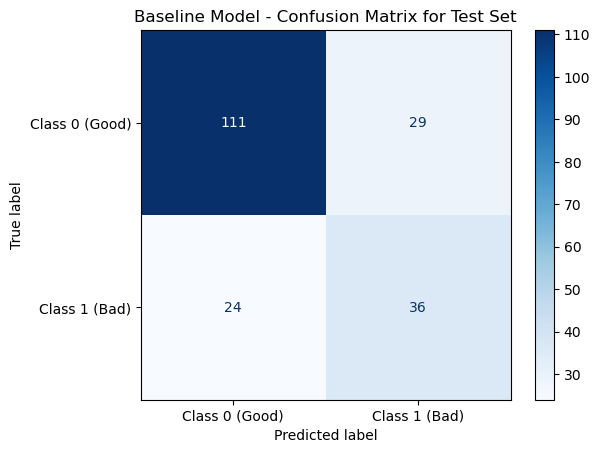

In [26]:
# --- Create and plot the ConfusionMatrixDisplay ---

# Initialize ConfusionMatrixDisplay object with the computed confusion matrix
# display_labels specify the class names for readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Class 0 (Good)', 'Class 1 (Bad)'])

# Plot the confusion matrix with a blue color map
disp.plot(cmap=plt.cm.Blues)

# Add a title for context
plt.title('Baseline Model - Confusion Matrix for Test Set')

# Show the plot
plt.show()

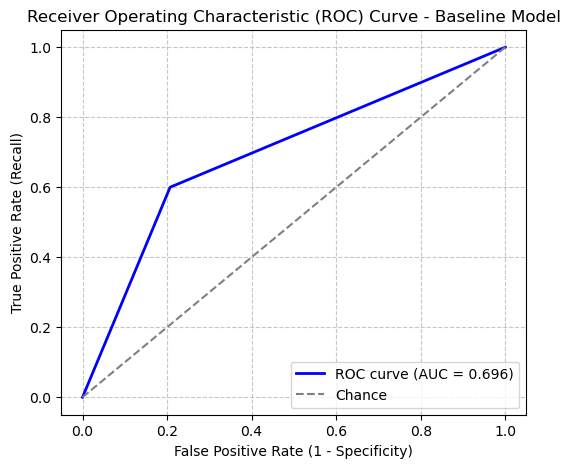

In [27]:
# --- Compute ROC curve and AUC ---

# fpr = false positive rate, tpr = true positive rate, roc_thresholds = thresholds used
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_prob)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_test_prob)

# --- Plot ROC Curve ---
plt.figure(figsize=(6, 5))

# Plot the ROC curve with AUC in label
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_test:.3f})', color="blue", lw=2)

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label="Chance")

# Label axes
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")

# Title and legend
plt.title("Receiver Operating Characteristic (ROC) Curve - Baseline Model")
plt.legend(loc="lower right")

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Display the plot
plt.show()

Improved Model

In [28]:
#----------------------Improved Model-------------------------------------

# --- Custom cost function for GridSearchCV ---
def cost_scorer(y_true, y_pred):
    """
    Computes a cost-sensitive score for model evaluation in GridSearchCV.
    
    Args:
        y_true: True labels (0=Good, 1=Bad)
        y_pred: Predicted labels from the classifier
    
    Returns:
        Negative of the total misclassification cost (FN*10 + FP*1)
        because GridSearchCV tries to maximize the scoring function.
    """
    
    # Compute confusion matrix; ensure order is Good=0, Bad=1
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    
    # Assign costs: FN has 10x higher cost than FP
    cost = fn*10 + fp*1
    
    # Return negative for GridSearchCV, which maximizes scores
    return -cost

In [29]:
# --- Parameter grid for GridSearchCV ---
param_grid = {
    # Maximum depth of the tree
    # Lower values can underfit, higher values may overfit
    "classifier__max_depth": [4, 5, 6],

    # Minimum number of samples required to split an internal node
    # Larger values reduce overfitting by preventing overly specific splits
    "classifier__min_samples_split": [2, 3, 4, 10, 11],

    # Minimum number of samples required to be at a leaf node
    # Larger values encourage broader, more stable leaves
    "classifier__min_samples_leaf": [10, 11, 12],

    # Class weights to handle imbalance
    # None = no weighting, {0:1, 1:2} and {0:1, 1:3} progressively emphasize the minority class (Bad)
    "classifier__class_weight": [None, {0:1, 1:2}, {0:1, 1:3}]
}

In [30]:
# --- Grid Search to find optimal hyperparameters ---
grid_search = GridSearchCV(
    estimator=pipeline,                     # Pipeline containing preprocessing + classifier
    param_grid=param_grid,                  # Grid of hyperparameters to search
    scoring=make_scorer(cost_scorer),      # Custom cost function: FN*10 + FP*1 (negative because GridSearchCV maximizes)
    cv=cv,                                  # Stratified 10-fold cross-validation to maintain class proportions
    n_jobs=-1,                              # Use all available CPU cores for faster computation
    verbose=1                               # Print progress messages during fitting
)

# Fit the grid search on the training data
# This evaluates all combinations of hyperparameters using the custom cost function
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpose',
                                                                          'status',
                                                                          'others',
                                                                          'housing',
                                                                          'job',
                                                                          'otherplans',
                                                                          'property']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['residence',
                                                                          'cards',
                                                                          'checkingstatus1_ord',
                                                                          'savings_ord',
                                                                          'liable...
                                                                          'employ_ord'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight={0: 1,
                                                                             1: 10},
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, {0: 1, 1: 2},
                                                      {0: 1, 1: 3}],
                         'classifier__max_depth': [4, 5, 6],
                         'classifier__min_samples_leaf': [10, 11, 12],
                         'classifier__min_samples_split': [2, 3, 4, 10, 11]},
             scoring=make_scorer(cost_scorer, response_method='predict'),
             verbose=1)

In [31]:
# --- Retrieve the best model after hyperparameter tuning ---
best_model = grid_search.best_estimator_  
# This is the pipeline (preprocessing + Decision Tree) configured with the best combination of hyperparameters found by GridSearchCV

# Print the hyperparameters that resulted in the lowest misclassification cost
print("Best Parameters:", grid_search.best_params_)  

# GridSearchCV maximizes the scoring metric, but our cost_scorer returns negative cost
# So, negate best_score_ to get the actual minimum misclassification cost
print("Best CV cost:", -grid_search.best_score_)  

Best Parameters: {'classifier__class_weight': {0: 1, 1: 3}, 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 12, 'classifier__min_samples_split': 2}
Best CV cost: 80.0


In [32]:
# --- Cross-validation threshold tuning ---
thresholds = np.linspace(0.1, 1, 201)  # Candidate thresholds from 0.1 to 1 in steps of 0.005
thresholds_best = []  # Stores best threshold per CV fold
cv_costs = []         # Stores corresponding minimum cost per fold

# Iterate over each fold of StratifiedKFold
for train_idx, val_idx in cv.split(X_train, y_train):
    # Split the data into training and validation sets for this fold
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the best model (from GridSearchCV) on the training portion of this fold
    best_model.fit(X_tr, y_tr)
    
    # Predict probabilities for the positive class (Bad)
    y_val_prob = best_model.predict_proba(X_val)[:, 1]
    
    best_cost = np.inf  # Initialize best cost for this fold
    best_thresh = 0.5   # Default threshold
    
    # Evaluate all candidate thresholds
    for thresh in thresholds:
        y_val_pred = (y_val_prob >= thresh).astype(int)  # Convert probabilities to class labels
        
        # Compute confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred, labels=[0,1]).ravel()
        
        # Compute misclassification cost: FN*10 + FP*1
        cost = fn*10 + fp*1
        
        # Update best threshold if cost is lower than previous best
        if cost < best_cost:
            best_cost = cost
            best_thresh = thresh
    
    # Store best threshold and corresponding cost for this fold
    thresholds_best.append(best_thresh)
    cv_costs.append(best_cost)

# Final threshold is the median of the best thresholds across all folds
final_threshold = np.median(thresholds_best)

# Display results
print("\nBest Thresholds per fold:", thresholds_best)
print("Median Threshold (CV):", final_threshold)
print("CV Costs per fold:", cv_costs)


Best Thresholds per fold: [0.21700000000000003, 0.1675, 0.20350000000000001, 0.17200000000000001, 0.1, 0.559, 0.2755, 0.1, 0.14950000000000002, 0.4780000000000001]
Median Threshold (CV): 0.18775000000000003
CV Costs per fold: [38, 43, 55, 50, 58, 53, 53, 76, 54, 56]


In [33]:
# --- Evaluate on full training set using the optimized threshold ---

# Predict probabilities for the positive class (Bad)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

# Apply the final optimized threshold to convert probabilities to class labels
y_train_pred = (y_train_prob >= final_threshold).astype(int)

# Compute the confusion matrix
# cm_train format: [[TN, FP],
#                   [FN, TP]]
cm_train = confusion_matrix(y_train, y_train_pred, labels=[0,1])

# Compute misclassification cost: FN*10 + FP*1
# FN = cm_train[1,0], FP = cm_train[0,1]
train_cost = cm_train[1,0]*10 + cm_train[0,1]*1

# Compute ROC-AUC using the predicted probabilities
train_roc = roc_auc_score(y_train, y_train_prob)

# Compute overall accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

In [34]:
# --- Evaluate on test set using the optimized threshold ---

# Predict probabilities for the positive class (Bad)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Apply the final optimized threshold to convert probabilities to class labels
y_test_pred = (y_test_prob >= final_threshold).astype(int)

# Compute confusion matrix
# Format: [[TN, FP],
#          [FN, TP]]
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0,1])

# Compute misclassification cost: FN*10 + FP*1
# FN = cm_test[1,0], FP = cm_test[0,1]
test_cost = cm_test[1,0]*10 + cm_test[0,1]*1

# Compute ROC-AUC using predicted probabilities
test_roc = roc_auc_score(y_test, y_test_prob)

# Compute overall accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print evaluation results
print("\nTest Evaluation")
print("-"*15)
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", cm_test)
print("ROC-AUC:", test_roc)
print("Misclassification Cost (FN*10 + FP*1):", test_cost)


Test Evaluation
---------------
Accuracy: 0.535
Confusion Matrix:
 [[52 88]
 [ 5 55]]
ROC-AUC: 0.745654761904762
Misclassification Cost (FN*10 + FP*1): 138


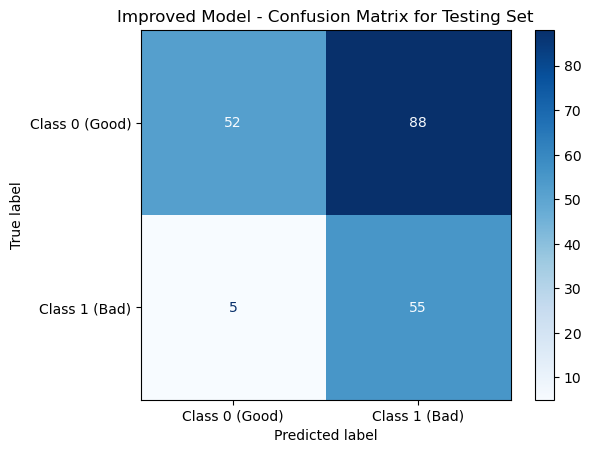

In [35]:
# --- Create and plot the ConfusionMatrixDisplay for the improved model ---

# Initialize ConfusionMatrixDisplay object with the test set confusion matrix
# 'display_labels' specify human-readable class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Class 0 (Good)', 'Class 1 (Bad)'])

# Plot the confusion matrix with a blue color map
disp.plot(cmap=plt.cm.Blues)

# Add a title to clarify which model and dataset this matrix represents
plt.title('Improved Model - Confusion Matrix for Testing Set')

# Display the plot
plt.show()

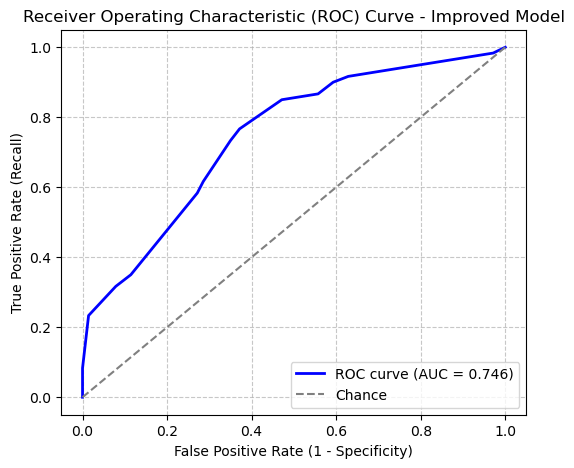

In [36]:
# --- Compute ROC curve and AUC ---

# fpr = false positive rate, tpr = true positive rate, roc_thresholds = thresholds used
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_prob)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_test_prob)

# --- Plot ROC Curve ---
plt.figure(figsize=(6, 5))

# Plot the ROC curve with AUC in label
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', color="blue", lw=2)

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label="Chance")

# Label axes
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")

# Title and legend
plt.title("Receiver Operating Characteristic (ROC) Curve - Improved Model")
plt.legend(loc="lower right")

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Display the plot
plt.show()

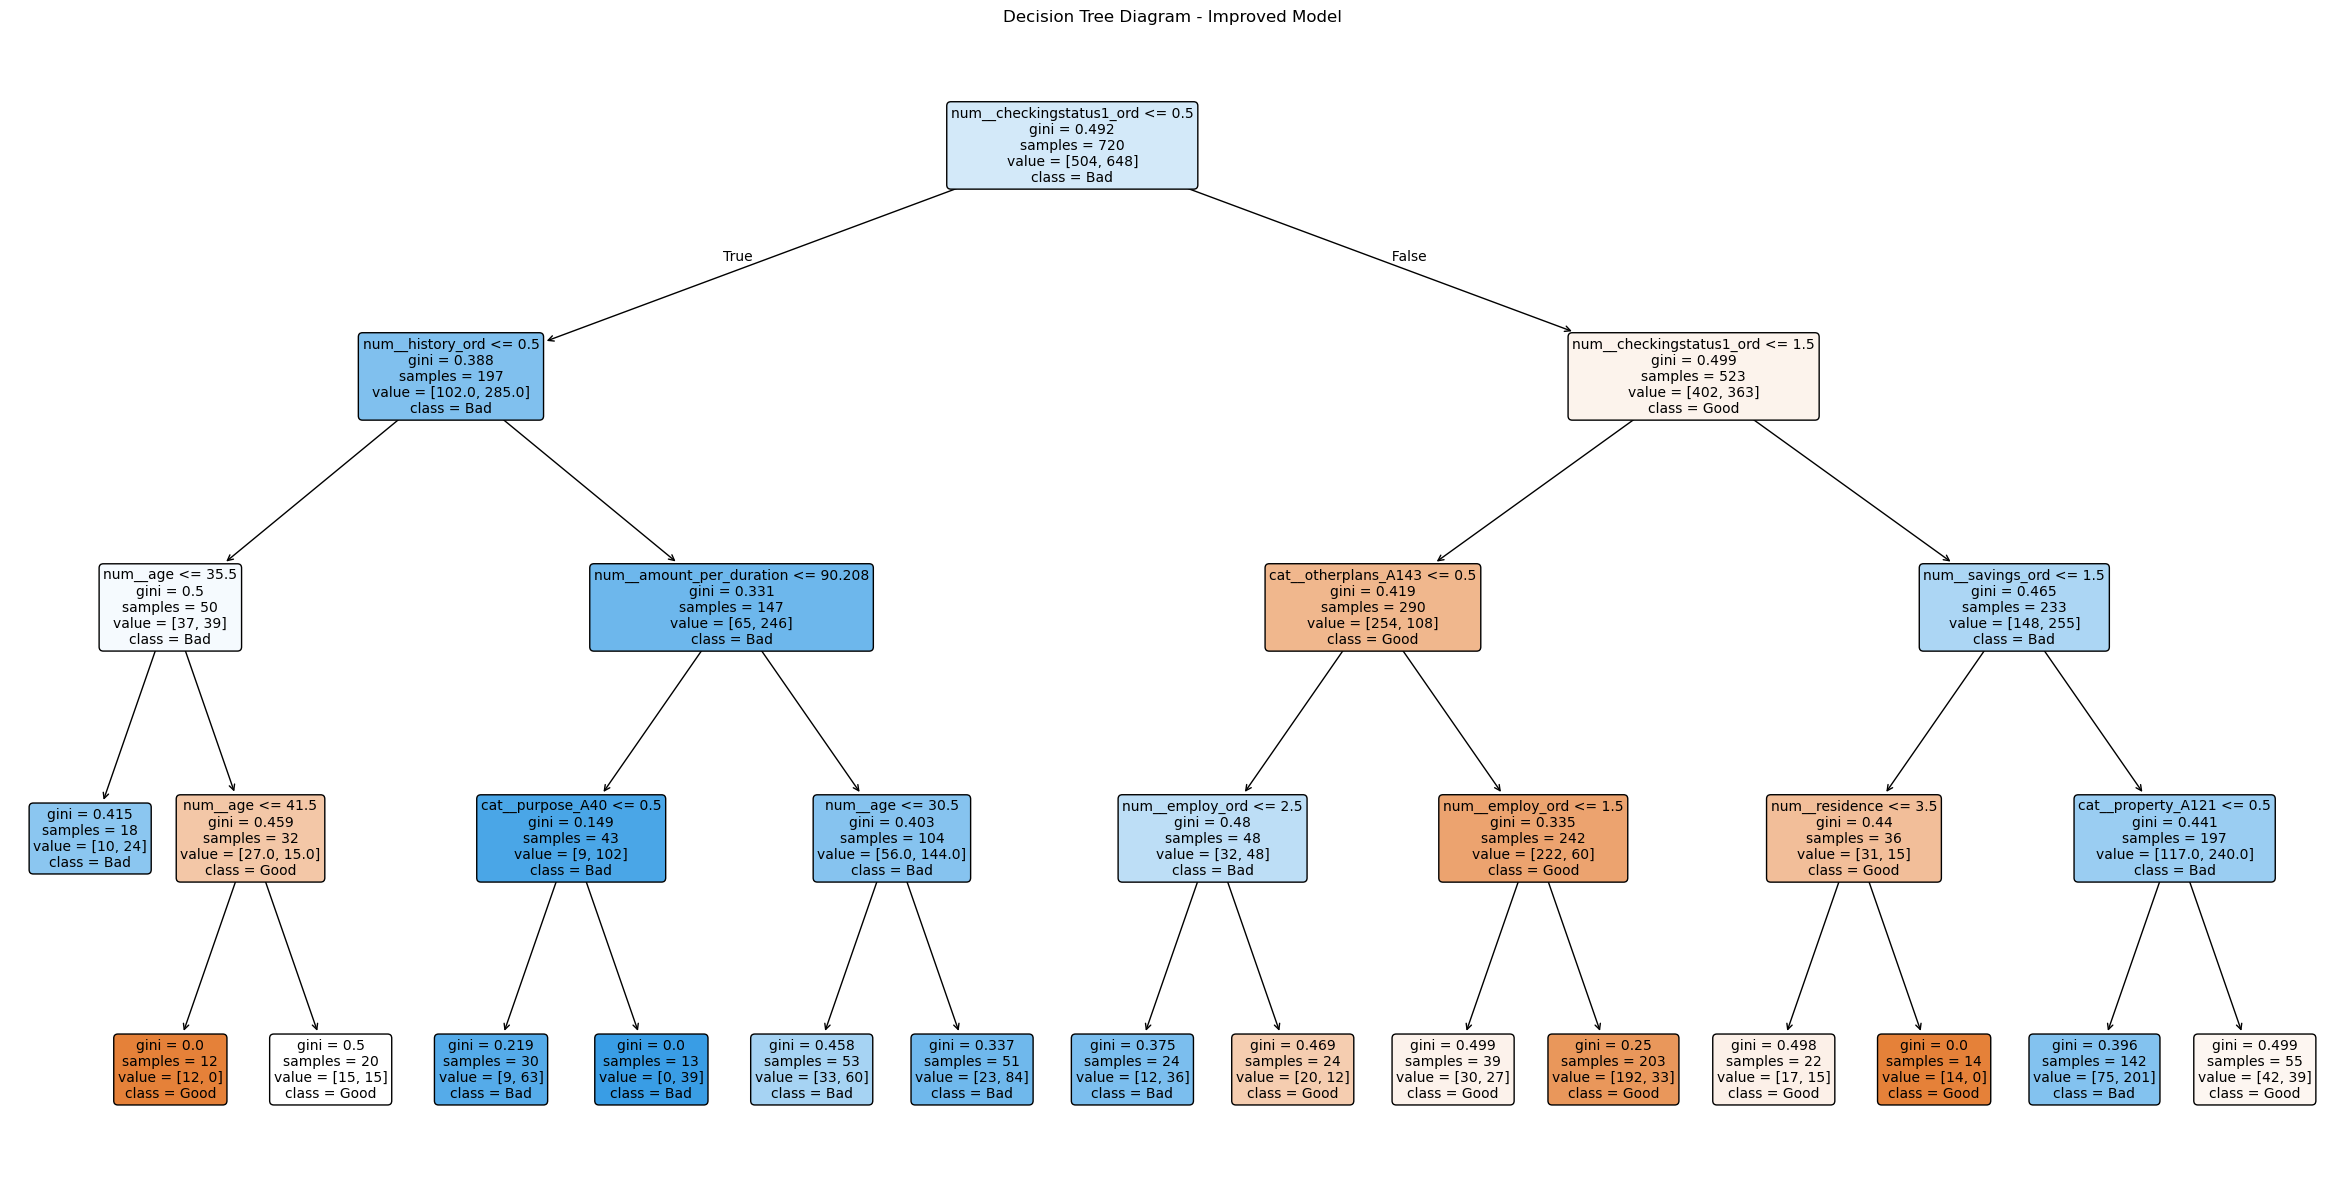

In [37]:
# --- Extract feature names and the trained Decision Tree from the pipeline ---

# Get final feature names after preprocessing (OneHotEncoded + numeric passthrough)
all_features = best_model.named_steps["preprocessor"].get_feature_names_out()

# Extract the trained Decision Tree model from the pipeline
dt_model = best_model.named_steps["classifier"]

# Plot the Decision Tree
plt.figure(figsize=(30, 15))  # Set figure size for readability

tree.plot_tree(
    dt_model,                     # Trained decision tree
    feature_names=all_features,   # Use the preprocessed feature names
    class_names=["Good", "Bad"],  # Class labels
    filled=True,                  # Fill nodes with color to indicate class
    fontsize=10,                  # Font size for node text
    rounded=True                  # Rounded node boxes for aesthetics
)

# Add a title for clarity
plt.title("Decision Tree Diagram - Improved Model")

# Display the plot
plt.show()

In [38]:
# Extract the fitted preprocessor
preprocessor_fitted = best_model.named_steps["preprocessor"]

# Extract OneHotEncoder from the fitted pipeline
ohe = preprocessor_fitted.named_transformers_["cat"]

# Get feature names from OHE (categorical variables)
ohe_features = ohe.get_feature_names_out(preprocessor_fitted.transformers_[0][2])

# Combine numerical + encoded categorical feature names
all_features = np.concatenate([ohe_features, num_cols])

# Feature importances from decision tree
clf_fitted = best_model.named_steps["classifier"]
importances = clf_fitted.feature_importances_

# Create DataFrame of importances
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Features by Importance:")
print(feature_importance_df.head(10))


Top 10 Features by Importance:
                Feature  Importance
33  checkingstatus1_ord    0.486728
26      otherplans_A143    0.116756
39           employ_ord    0.094498
38                  age    0.067488
34          savings_ord    0.061014
37          history_ord    0.058905
27        property_A121    0.047648
36  amount_per_duration    0.035289
31            residence    0.026736
0           purpose_A40    0.004938


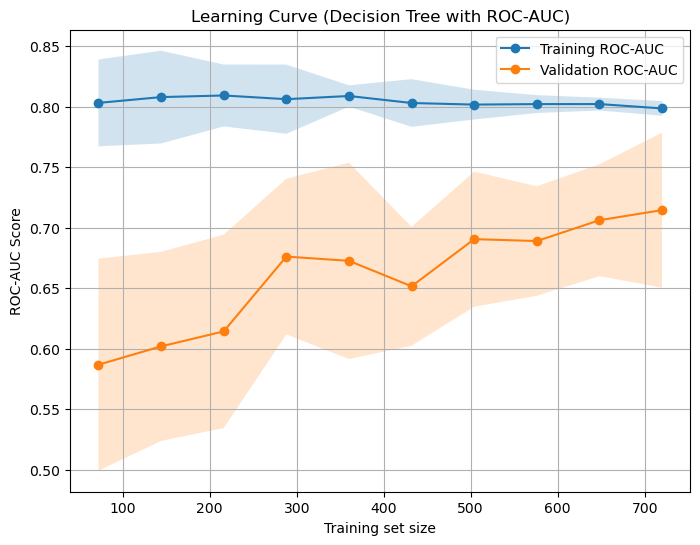

In [39]:
# --- Generate learning curve ---
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,           # Pipeline containing preprocessor + tuned Decision Tree
    X=X_train,                      # Training features
    y=y_train,                      # Training labels
    cv=10,                          # 10-fold cross-validation
    scoring="roc_auc",              # Use ROC-AUC as the evaluation metric
    n_jobs=-1,                      # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary training size from 10% to 100%
    shuffle=True,                   # Shuffle data before splitting for reproducibility
    random_state=42                 # Set random seed for reproducibility
)

# --- Compute mean and standard deviation for plotting ---
train_mean = np.mean(train_scores, axis=1)  # Average training ROC-AUC across folds
train_std = np.std(train_scores, axis=1)    # Standard deviation of training ROC-AUC
val_mean = np.mean(val_scores, axis=1)      # Average validation ROC-AUC across folds
val_std = np.std(val_scores, axis=1)        # Standard deviation of validation ROC-AUC

# --- Plot learning curve ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training ROC-AUC")  # Training curve
plt.plot(train_sizes, val_mean, 'o-', label="Validation ROC-AUC")  # Validation curve

# Shaded area represents ±1 standard deviation
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.xlabel("Training set size")
plt.ylabel("ROC-AUC Score")
plt.title("Learning Curve (Decision Tree with ROC-AUC)")
plt.legend(loc="best")
plt.grid(True)
plt.show()